In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-ball-by-ball-2008-to-2022/deliveries_updated_mens_ipl.csv
/kaggle/input/ipl-ball-by-ball-2008-to-2022/matches_updated_mens_ipl.csv
/kaggle/input/ipl-ball-by-ball-2008-to-2022/IPL_ball_by_ball_updated.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Set the maximum number of rows to be displayed in the output without truncation
pd.set_option('display.max_rows',None)
# Set the maximum number of columns to be displayed in the output without truncation
pd.set_option('display.max_columns', None)
# Prevent the DataFrame from wrapping across multiple lines in the output
pd.set_option('display.expand_frame_repr', False)

# **IMPORTING IPL BALL BY BALL DATA FROM 2008 TO 2023**

In [5]:
data=pd.read_csv('/kaggle/input/ipl-ball-by-ball-2008-to-2022/IPL_ball_by_ball_updated.csv')

#  Understanding the Dataset

In [6]:
data.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

# #Description of each columns in the dataframe

- **match_id:** The unique identifier for each match.
- **season:** The year in which the cricket season took place.
- **start_date:** The date on which the match started.
- **venue:** The location or stadium where the match was played.
- **innings:** The inning number (1st or 2nd) in the match.
- **ball:** The ball number in the current over.
- **batting_team:** The team that is currently batting.
- **bowling_team:** The team that is currently bowling.
- **striker:** The batsman facing the current delivery.
- **non_striker:** The batsman at the non-striker's end.
- **bowler:** The bowler delivering the current over.
- **runs_off_bat:** The number of runs scored by the batsman without extras.
- **extras:** The total number of extra runs (wides, no-balls, byes, leg-byes, penalty) in the current delivery.
- **wides:** The number of wide deliveries bowled in the current delivery.
- **noballs:** The number of no-ball deliveries bowled in the current delivery.
- **byes:** The number of byes scored in the current delivery.
- **legbyes:** The number of leg-byes scored in the current delivery.
- **penalty:** The number of runs scored as a penalty in the current delivery.
- **wicket_type:** The type of dismissal (if a wicket falls), such as caught, bowled, etc.
- **player_dismissed:** The player who got dismissed in the current delivery.
- **other_wicket_type:** Additional information about the type of dismissal (if any).
- **other_player_dismissed:** Additional information about the player dismissed (if any).

Note: NaN values indicate missing or undefined data in the dataset.


In [7]:
data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.shape

(243815, 22)

# Batting Performance Over Time:
Let's

-Analyze MS Dhoni's runs scored in each IPL season.

-Calculate his batting average and strike rate over the years.

-Plot trends in his performance to identify any noticeable patterns.


In [9]:
# Replace 'Player_Name' with the name of the player you're interested in
player_name = 'MS Dhoni'

# Filter the DataFrame for the specified player
player_data = data[data['striker'] == player_name]

# Calculate the total runs scored by the player
total_runs_scored = player_data['runs_off_bat'].sum()

print(f'Total runs scored by {player_name}: {total_runs_scored}')

Total runs scored by MS Dhoni: 5082


Let's Analyze MS Dhoni's runs scored in each IPL season.


In [10]:
player_data.groupby('season')['runs_off_bat'].sum()

season
2008    414
2009    332
2010    287
2011    392
2012    358
2013    461
2014    371
2015    372
2016    284
2017    290
2018    455
2019    416
2020    200
2021    114
2022    232
2023    104
Name: runs_off_bat, dtype: int64

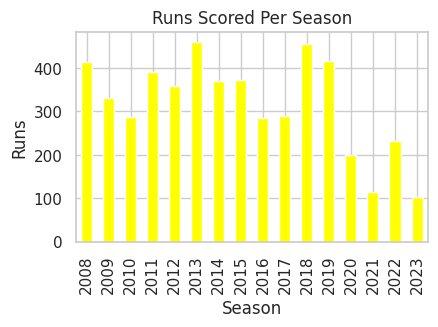

In [48]:
runs_per_season = player_data.groupby('season')['runs_off_bat'].sum()

# Runs scored per season
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
runs_per_season.plot(kind='bar', color='yellow')
plt.title('Runs Scored Per Season')
plt.xlabel('Season')
plt.ylabel('Runs')
plt.savefig('RunsSoredperSeason_MSD.png')


# AVERAGE OF MSD


To calculate the batting average for a specific player, you can use the formula:

Batting Average = Total Runs / number of matches in which the player batted



In [12]:
# Count the number of unique matches in which the player batted
matches_batted = player_data['match_id'].nunique()
matches_batted

217

In [13]:
total_runs_scored = player_data['runs_off_bat'].sum()
total_runs_scored

5082

In [14]:
Batting_Average = total_runs_scored / matches_batted
Batting_Average.round(2)

23.42

season
2008    29.571429
2009    25.538462
2010    26.090909
2011    30.153846
2012    21.058824
2013    28.812500
2014    24.733333
2015    21.882353
2016    23.666667
2017    19.333333
2018    30.333333
2019    34.666667
2020    16.666667
2021    10.363636
2022    19.333333
2023     8.666667
dtype: float64


Text(0, 0.5, 'Batting Average')

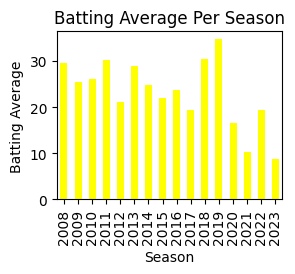

In [23]:
# Batting Average per Season
batting_average = player_data.groupby('season')['runs_off_bat'].sum()/player_data.groupby('season')['match_id'].nunique()
print(batting_average)
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 2)
batting_average.plot(kind='bar', color='yellow')
plt.title('Batting Average Per Season')
plt.xlabel('Season')
plt.ylabel('Batting Average')
plt.f


# **Strike Rate =  (Total Runs / Total Balls Faced) * 100**

In [16]:
#Dhoni Overall Strike Rate
Overall_Strike_Rate = (player_data['runs_off_bat'].sum()/player_data['ball'].count())*100
Overall_Strike_Rate


131.48771021992238

In [17]:
# Dhoni Season wise Strike Rate
strike_rate = (player_data.groupby('season')['runs_off_bat'].sum() / player_data.groupby('season')['ball'].count()) * 100
strike_rate

season
2008    129.780564
2009    122.962963
2010    133.488372
2011    158.704453
2012    126.501767
2013    154.697987
2014    143.798450
2015    120.388350
2016    129.090909
2017    111.111111
2018    141.744548
2019    131.230284
2020    114.285714
2021    102.702703
2022    117.171717
2023    165.079365
dtype: float64

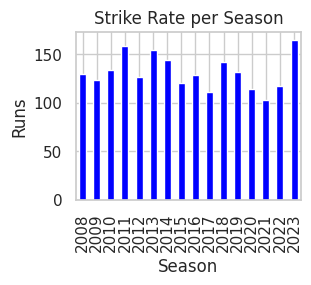

In [43]:
plt.subplot(2, 2, 1)
strike_rate.plot(kind='bar', color='blue')
plt.title('Strike Rate per Season')
plt.xlabel('Season')
plt.ylabel('Runs')
plt.savefig('strike_rate.png')


# Consistency and Impact:

- Look at the number of matches where MS Dhoni batted.
- Assess his consistency by analyzing the number of runs in different innings.
- Check for instances where he played match-winning innings.

In [19]:
agg_dhoni_data = player_data.groupby('match_id').agg({
    'runs_off_bat': 'sum',
    'ball': 'count',
    'wicket_type': 'count',
    'innings':lambda x: x.iloc[0]
})


In [20]:
# Number of matches where MS Dhoni batted
matches_batted = player_data['match_id'].nunique()

# Analyzing runs in different innings
runs_by_inning = player_data.groupby('innings')['runs_off_bat'].mean()

# dhoni_aggregate = player_data.groupby()
# Identify instances where Dhoni hits 2 or more sixes in the 19th over
match_winning_innings = player_data[(player_data['ball'] >= 19) & (player_data['runs_off_bat'] == 6)].groupby('match_id').filter(lambda x: len(x) >= 2)

# Display the instances of match-winning innings
print(f'\nLast Over :',len(match_winning_innings))
print(match_winning_innings[['match_id', 'innings', 'runs_off_bat', 'ball' ]])


# Display the results
print(f"Number of Matches MS Dhoni Batted In: {matches_batted}")
print(f"\nAverage Runs in Different Innings:\n{runs_by_inning}")
# print(f"\nInstances of Match-Winning Innings:\n{match_winning_innings[['match_id', 'innings', 'runs_off_bat']]}")



Last Over : 34
        match_id  innings  runs_off_bat  ball
40170     419159        2             6  19.3
40171     419159        2             6  19.4
54481     501253        1             6  19.5
54482     501253        1             6  19.6
57250     501266        1             6  19.1
57253     501266        1             6  19.4
94543     598073        2             6  19.3
94544     598073        2             6  19.4
106387    734029        1             6  19.1
106390    734029        1             6  19.4
109203    829707        1             6  19.3
109204    829707        1             6  19.4
134897    981005        2             6  19.3
134900    981005        2             6  19.6
134901    981005        2             6  19.7
149715   1082647        1             6  19.2
149717   1082647        1             6  19.4
167555   1175367        1             6  19.5
167556   1175367        1             6  19.6
167558   1175367        1             6  19.8
174187   1178414  

In [21]:
player_data.groupby('match_id')['runs_off_bat']

In [27]:
agg_dhoni_data = player_data.groupby('match_id').agg({
    'runs_off_bat': 'sum',
    'ball': 'count',
    'wicket_type': 'count'
    
})


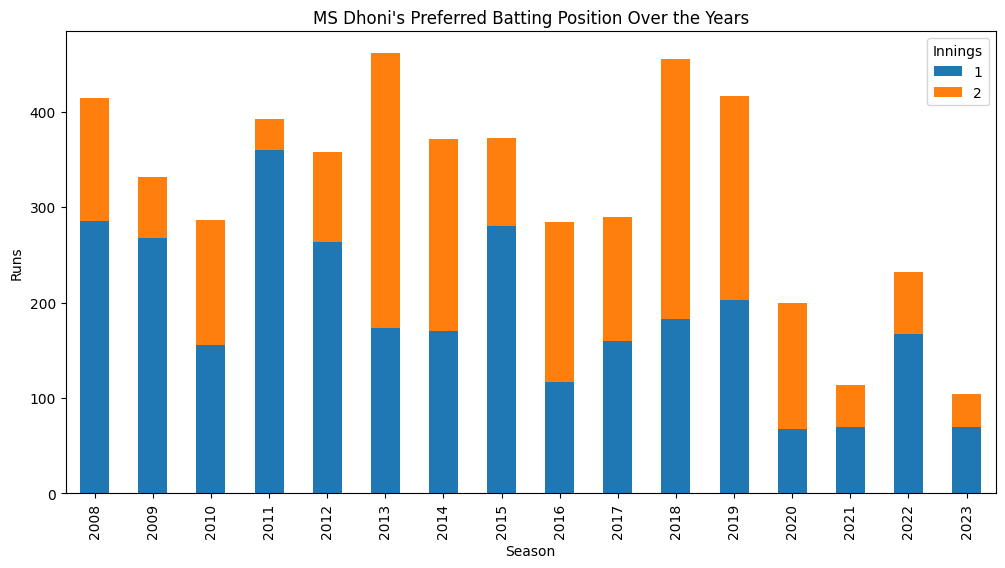

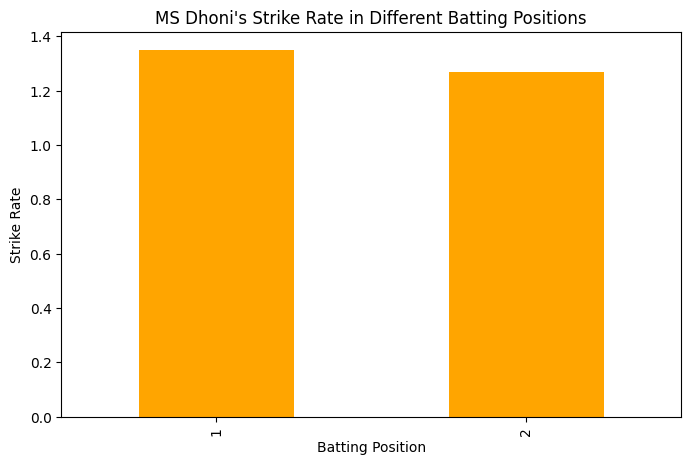

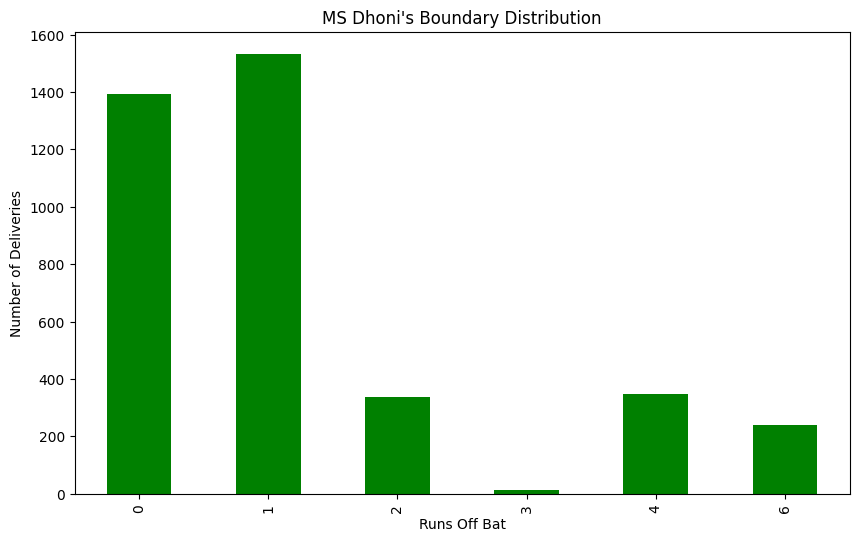

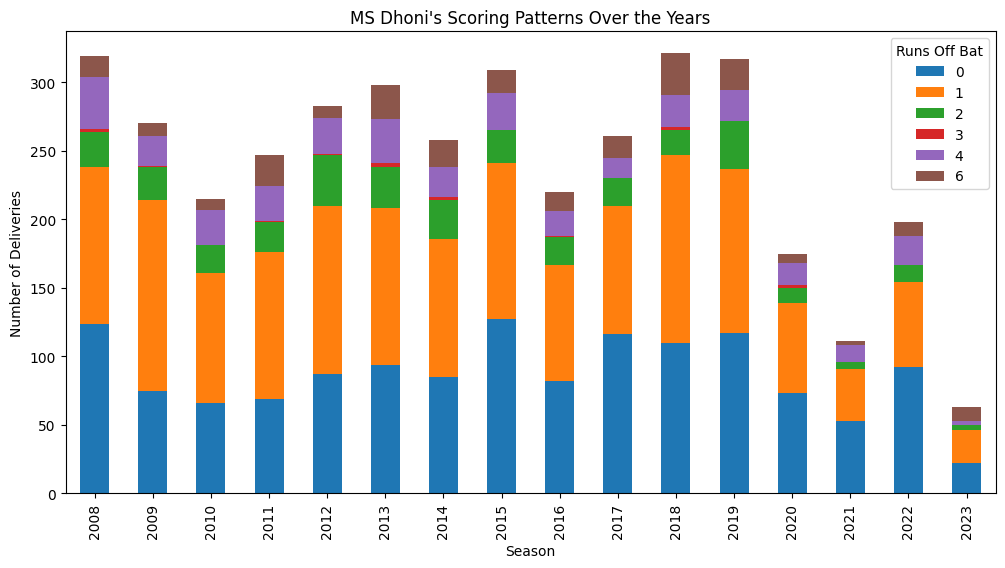

In [28]:
# Analysing Innings wise Runs by MSD
batting_position_over_years = player_data.groupby(['season', 'innings'])['runs_off_bat'].sum().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('MS Dhoni\'s Preferred Batting Position Over the Years')
plt.xlabel('Season')
plt.ylabel('Runs')
plt.legend(title='Innings', loc='upper right')
plt.show()

# Analyze strike rate in Innings
strike_rate_by_position = player_data.groupby('innings')['runs_off_bat'].mean().plot(kind='bar', color='orange', figsize=(8, 5))
plt.title('MS Dhoni\'s Strike Rate in Different Batting Positions')
plt.xlabel('Batting Position')
plt.ylabel('Strike Rate')
plt.show()

# Investigate scoring patterns in terms of boundaries
boundary_distribution = player_data.groupby('runs_off_bat').size().plot(kind='bar', color='green', figsize=(10, 6))
plt.title('MS Dhoni\'s Boundary Distribution')
plt.xlabel('Runs Off Bat')
plt.ylabel('Number of Deliveries')
plt.show()

# Check for changes in scoring patterns
scoring_patterns_over_years = player_data.groupby(['season', 'runs_off_bat'])['ball'].count().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('MS Dhoni\'s Scoring Patterns Over the Years')
plt.xlabel('Season')
plt.ylabel('Number of Deliveries')
plt.legend(title='Runs Off Bat', loc='upper right')
plt.show()


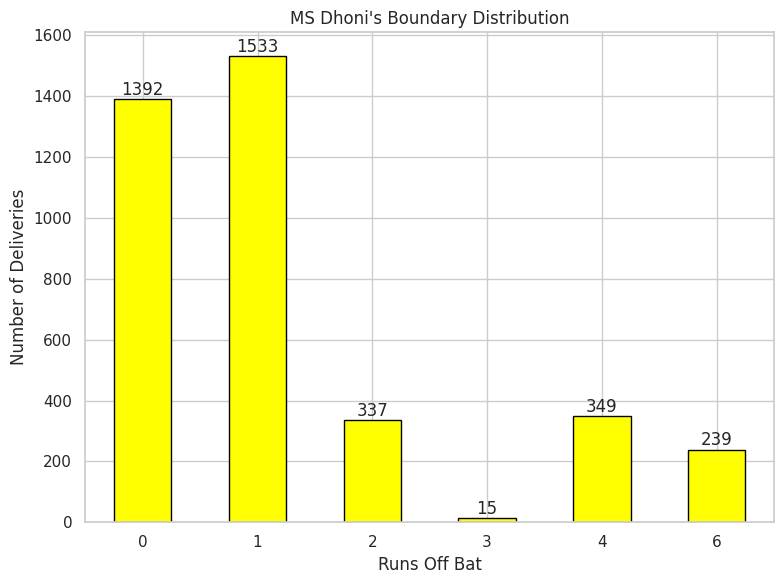

In [54]:
plt.figure(figsize=(8, 6))
boundary_distribution = player_data.groupby('runs_off_bat').size().plot(kind='bar', color='Yellow', edgecolor='black')

plt.title('MS Dhoni\'s Boundary Distribution')
plt.xlabel('Runs Off Bat')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=0)

# Adding labels to the bars
for i, value in enumerate(player_data.groupby('runs_off_bat').size()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('boundary_distribution_plot.png')
plt.show()

Boundary Distribution for MS Dhoni's Innings in 2023:
   runs_off_bat  Count
0             0     22
1             1     24
2             2      4
3             4      3
4             6     10


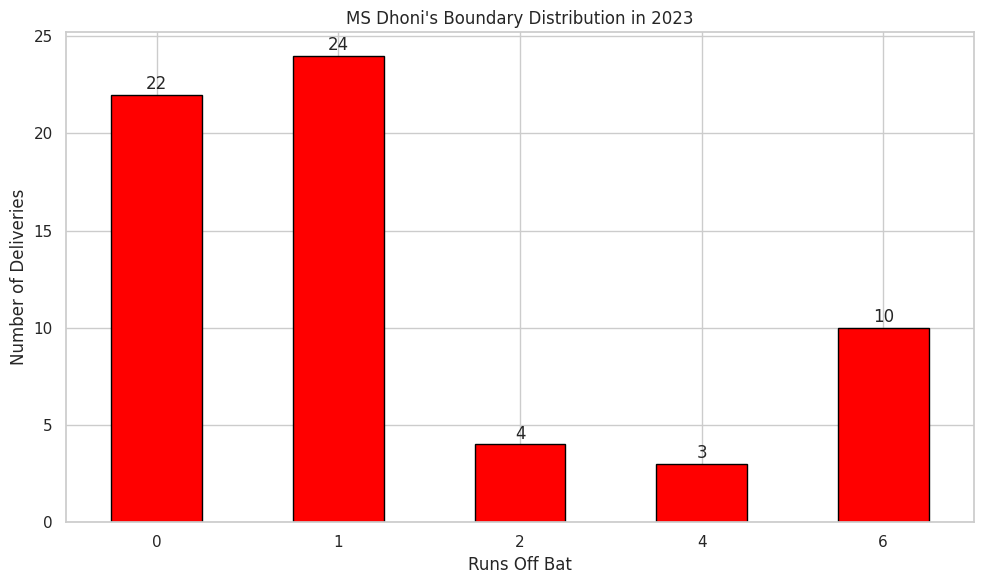

In [50]:
import seaborn as sns

sns.set(style="whitegrid")

# Replace 'MS Dhoni' with the actual name used in the 'striker' column
player_name = 'MS Dhoni'

# Filter the DataFrame for MS Dhoni's innings in 2023
dhoni_data_2023 = data[(data['striker'] == player_name) & (data['season'] == 2023)]

boundary_distribution_2023 = dhoni_data_2023.groupby('runs_off_bat').size().reset_index(name='Count')

# Display the table
print("Boundary Distribution for MS Dhoni's Innings in 2023:")
print(boundary_distribution_2023)

# Investigate boundary distribution for 2023
plt.figure(figsize=(10, 6))
boundary_distribution_2023 = dhoni_data_2023.groupby('runs_off_bat').size().plot(kind='bar', color='red', edgecolor='black')
plt.title('MS Dhoni\'s Boundary Distribution in 2023')
plt.xlabel('Runs Off Bat')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=0)
# Adding labels to the bars
for i, value in enumerate(dhoni_data_2023.groupby('runs_off_bat').size()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('boundary_distribution_2023_plot.png')

plt.show()

Contingency Table for MS Dhoni's Runs and Seasons - Last 3 Years:
season        2021  2022  2023
runs_off_bat                  
0               53    92    22
1               38    62    24
2                5    13     4
4               12    21     3
6                3    10    10


<Figure size 1000x600 with 0 Axes>

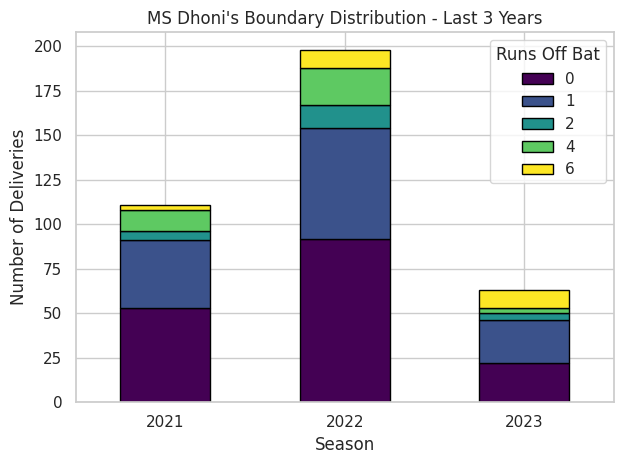

In [31]:
dhoni_data_last_three_years = data[(data['striker'] == player_name) & (data['season'].isin([2021, 2022, 2023]))]
# Create a contingency table
contingency_table = pd.crosstab(index=dhoni_data_last_three_years['runs_off_bat'], columns=dhoni_data_last_three_years['season'])

# Display the contingency table
print("Contingency Table for MS Dhoni's Runs and Seasons - Last 3 Years:")
print(contingency_table)
# Investigate boundary distribution for the last three years
plt.figure(figsize=(10, 6))
boundary_distribution_last_three_years = dhoni_data_last_three_years.groupby(['season', 'runs_off_bat']).size().unstack().plot(kind='bar', stacked=True, cmap='viridis', edgecolor='black')
plt.title('MS Dhoni\'s Boundary Distribution - Last 3 Years')
plt.xlabel('Season')
plt.ylabel('Number of Deliveries')
plt.legend(title='Runs Off Bat', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**In conclusion,**

the data paints a comprehensive picture of MS Dhoni's performance in the last three years. While age may bring about changes, Dhoni's ability to adapt, contribute, and lead from the front remains unmatched.

As we eagerly await IPL 2024, one thing is certain - MS Dhoni's presence in the lineup is not just about statistics; it's about the invaluable experience, leadership, and unmatched ability to finish games.
Only time will tell, but the numbers suggest that MS Dhoni is still a significant presence in the world of cricket.